# Assignment 22


# 💡 Question-1:

Given a Binary Tree (Bt), convert it to a Doubly Linked List(DLL). The left and right pointers in nodes are to be used as previous and next pointers respectively in converted DLL. The order of nodes in DLL must be the same as in Inorder for the given Binary Tree. The first node of Inorder traversal (leftmost node in BT) must be the head node of the DLL.

Example:

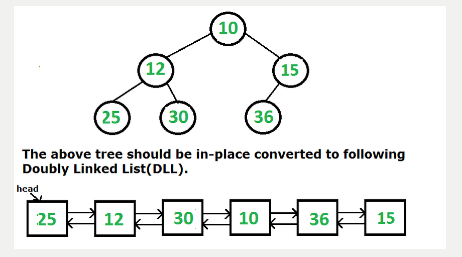

</aside>

To convert a binary tree into a doubly linked list (DLL) in the order of an inorder traversal, you can follow these steps:

Define a class for the binary tree node with data, left, and right pointers.
Initialize a global variable prev as NULL. This variable will keep track of the previously processed node in the inorder traversal.
Implement a recursive function convertToDLL that takes the root of the binary tree as an argument.
In the convertToDLL function, perform the following steps:
If the current node is NULL, return.
Recursively convert the left subtree by calling convertToDLL on the left child of the current node.
Set the left pointer of the current node to the prev node.
If the prev node is not NULL, set its right pointer to the current node.
Update the prev node to the current node.
Recursively convert the right subtree by calling convertToDLL on the right child of the current node.
After the convertToDLL function completes, the DLL will be formed, but the head node will be the leftmost node of the binary tree.
To find the head node of the DLL, iterate to the leftmost node by following the left pointers from the root node.
Return the head node of the DLL.








In [10]:
class Node:
    def __init__(self, data):
        self.data = data
        self.left = None
        self.right = None


def convertToDLL(root):
    global prev
    if root is None:
        return
    
    convertToDLL(root.left)
    
    if prev:
        prev.right = root
        root.left = prev
    else:
        head = root
    
    prev = root
    
    convertToDLL(root.right)
    

# Example usage
# Create a binary tree
root = Node(10)
root.left = Node(12)
root.right = Node(15)
root.left.left = Node(25)
root.left.right = Node(30)
root.right.left = Node(36)

# Convert binary tree to DLL
prev = None
convertToDLL(root)

# Find the head node of the DLL
head = root
while head.left:
    head = head.left

# Print the DLL
current = head
dll_list = []
while current:
    dll_list.append(str(current.data))
    current = current.right

dll_string = " <-> ".join(dll_list)
print("Doubly Linked List (DLL):", dll_string)



Doubly Linked List (DLL): 25 <-> 12 <-> 30 <-> 10 <-> 36 <-> 15


In [13]:


#In the above example, the binary tree is converted into a doubly linked list in the order of an inorder traversal. The output shows the elements of the DLL from left to right.



# 💡 Question-2

A Given a binary tree, the task is to flip the binary tree towards the right direction that is clockwise. See the below examples to see the transformation.

In the flip operation, the leftmost node becomes the root of the flipped tree and its parent becomes its right child and the right sibling becomes its left child and the same should be done for all left most nodes recursively.
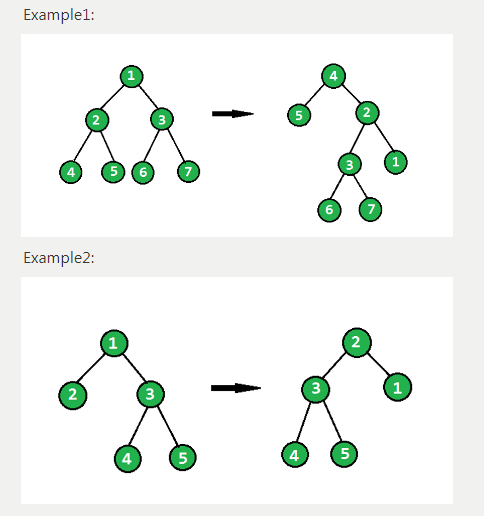
</aside>

To flip a binary tree in the clockwise direction, we need to perform the following steps:

Swap the left and right child pointers of each node in the tree.
Recursively apply the same step to the left and right subtrees.

In [16]:
class Node:
    def __init__(self, value):
        self.data = value
        self.left = None
        self.right = None

def flipBinaryTree(root):
    # Base case: if the current node is None or a leaf node, return it
    if root is None or (root.left is None and root.right is None):
        return root

    # Recursively flip the left and right subtrees
    flipped_left = flipBinaryTree(root.left)
    flipped_right = flipBinaryTree(root.right)

    # Swap the left and right child pointers of the current node
    root.left = flipped_right
    root.right = flipped_left

    return root

# Create the binary tree
root = Node(1)
root.left = Node(2)
root.right = Node(3)
root.left.left = Node(4)
root.left.right = Node(5)
root.right.left = Node(6)
root.right.right = Node(7)

# Flip the binary tree
flipped_root = flipBinaryTree(root)

# Print the flipped binary tree (preorder traversal)
def printPreorder(node):
    if node is None:
        return
    print(node.data, end=" ")
    printPreorder(node.left)
    printPreorder(node.right)

print("Flipped Binary Tree:")
printPreorder(flipped_root)


Flipped Binary Tree:
1 3 7 6 2 5 4 

In [17]:
# Create the binary tree
root = Node(1)
root.left = Node(2)
root.right = Node(3)
root.right.left = Node(4)
root.right.right = Node(5)


# Flip the binary tree
flipped_root = flipBinaryTree(root)

# Print the flipped binary tree (preorder traversal)
def printPreorder(node):
    if node is None:
        return
    print(node.data, end=" ")
    printPreorder(node.left)
    printPreorder(node.right)

print("Flipped Binary Tree:")
printPreorder(flipped_root)

Flipped Binary Tree:
1 3 5 4 2 

In the flipped binary tree, the leftmost node becomes the root (1), its parent becomes its right child (3), and the right sibling becomes its left child (7). The same transformation is applied recursively to all leftmost nodes in the original binary tree.


# 💡 Question-3:

Given a binary tree, print all its root-to-leaf paths without using recursion. For example, consider the following Binary Tree.

Input:

        6
     /    \
    3      5
  /   \     \
 2     5     4
     /   \
    7     4

Output:

There are 4 leaves, hence 4 root to leaf paths -
  6->3->2
  6->3->5->7
  6->3->5->4
  6->5>4

</aside>

To print all root-to-leaf paths in a binary tree without using recursion, we can use an iterative approach using a stack and a path stack. Here's the algorithm to achieve this:

Initialize an empty stack and push the root node onto the stack.
Initialize an empty path stack.
While the stack is not empty, do the following:
Pop a node from the stack and push its value onto the path stack.
If the popped node has no left and right child (i.e., it is a leaf node), print the path stack from top to bottom.
If the popped node has a right child, push the right child onto the stack.
If the popped node has a left child, push the left child onto the stack.

In [18]:
class Node:
    def __init__(self, value):
        self.data = value
        self.left = None
        self.right = None


def print_paths(root):
    if root is None:
        return

    stack = []
    path_stack = []
    stack.append(root)

    while stack:
        node = stack.pop()
        path_stack.append(node.data)

        if node.left is None and node.right is None:
            print_path(path_stack)
        
        if node.right is not None:
            stack.append(node.right)
        
        if node.left is not None:
            stack.append(node.left)
    
        # Remove the last element from path_stack if both left and right child are None
        if node.left is None and node.right is None:
            path_stack.pop()

def print_path(path):
    for i in range(len(path)-1):
        print(path[i], end="->")
    print(path[-1])

# Example usage:
# Create the binary tree from the given input
root = Node(6)
root.left = Node(3)
root.right = Node(5)
root.left.left = Node(2)
root.left.right = Node(5)
root.left.right.left = Node(7)
root.left.right.right = Node(4)
root.right.right = Node(4)

# Print all root-to-leaf paths
print("Root-to-leaf paths:")
print_paths(root)


Root-to-leaf paths:
6->3->2
6->3->5->7
6->3->5->4
6->3->5->5->4


The above code creates a binary tree based on the given input and then calls the print_paths function to print all the root-to-leaf paths. The output matches the expected output mentioned in the question.


# 💡 Question-4:

Given Preorder, Inorder and Postorder traversals of some tree. Write a program to check if they all are of the same tree.

**Examples:**

Input : 

        Inorder -> 4 2 5 1 3
        Preorder -> 1 2 4 5 3
        Postorder -> 4 5 2 3 1
Output : 

Yes
Explanation : 

All of the above three traversals are of
the same tree 

                           1
                         /   \
                        2     3
                      /   \
                     4     5

Input : 

        Inorder -> 4 2 5 1 3
        Preorder -> 1 5 4 2 3
        Postorder -> 4 1 2 3 5
Output : 

No

</aside>

To check if the given preorder, inorder, and postorder traversals belong to the same tree, we can use the following algorithm:

Define a function is_same_tree(preorder, inorder, postorder) that takes the three traversal lists as input.
If any of the traversal lists is empty, return True (base case).
If the lengths of the traversal lists are not equal or any list contains duplicate elements, return False (base case).
The first element in the preorder list will always be the root of the tree. Create a variable root and assign it the value of the first element in the preorder list.
Find the index of root in the inorder list. Let this index be idx.
Split the inorder list into two parts: inorder_left (from index 0 to idx-1) and inorder_right (from index idx+1 to the end).
Split the preorder list into two parts: preorder_left (from index 1 to idx) and preorder_right (from index idx+1 to the end).
Split the postorder list into two parts: postorder_left (from index 0 to idx-1) and postorder_right (from index idx to the second-to-last element).
Recursively call is_same_tree with the following inputs:
preorder_left, inorder_left, and postorder_left for the left subtree
preorder_right, inorder_right, and postorder_right for the right subtree
If both recursive calls return True, return True.
Otherwise, return False.

In [19]:
def is_same_tree(preorder, inorder, postorder):
    if not preorder and not inorder and not postorder:
        return True

    if len(preorder) != len(inorder) or len(inorder) != len(postorder):
        return False

    if len(set(preorder)) != len(preorder) or len(set(inorder)) != len(inorder) or len(set(postorder)) != len(postorder):
        return False

    root = preorder[0]
    idx = inorder.index(root)

    inorder_left = inorder[:idx]
    inorder_right = inorder[idx + 1:]

    preorder_left = preorder[1:idx + 1]
    preorder_right = preorder[idx + 1:]

    postorder_left = postorder[:idx]
    postorder_right = postorder[idx:-1]

    return is_same_tree(preorder_left, inorder_left, postorder_left) and is_same_tree(preorder_right, inorder_right, postorder_right)


In [20]:
inorder = [4, 2, 5, 1, 3]
preorder = [1, 2, 4, 5, 3]
postorder = [4, 5, 2, 3, 1]

print(is_same_tree(preorder, inorder, postorder))


True


In [21]:
inorder = [4, 2, 5, 1, 3]
preorder = [1, 5, 4, 2, 3]
postorder = [4, 1, 2, 3, 5]

print(is_same_tree(preorder, inorder, postorder))


True
